**Part 1**

**Narrative for Analysis/Model Building Business Problem**

**Introduction:**
Mental health is a growing concern among students, impacted by academic, social, and future career pressures. Universities must support student well-being but often struggle to identify those needing help before problems worsen.

**Business Problem:**
Universities face challenges in timely identification and intervention for students experiencing mental health issues. Traditional methods, like self-reporting and surveys, are often insufficient, leading to delayed support, worsening mental health issues, and negatively impacting academic performance and retention.

**Proposed Solution:**
Develop a predictive model to identify students at risk of mental health issues by analyzing demographics, academic performance, and social behaviors. This model will provide early warnings to university counseling services, allowing for timely interventions and better mental health resource allocation.

**Target for the Model:**
University administration and counseling services will use the model to identify at-risk students and prioritize interventions, enhancing student support systems and improving mental health outcomes and academic success.

**Implementation Strategy:**

**Data Collection and Preparation:** 
Utilize a Kaggle dataset with variables like age, gender, course of study, and mental health indicators. Ensure data cleanliness and completeness.
Exploratory Data Analysis (EDA): Conduct initial analysis with histograms of mental health scores, bar charts comparing scores across demographics, a correlation matrix, and time-series analysis if applicable.

**Model Development:** 
Develop a predictive model using machine learning algorithms such as logistic regression, decision trees, and random forests. Train and validate the model using a portion of the dataset and evaluate performance metrics on a test set.
Deployment and Integration: Integrate the final model into the university's systems, providing regular updates to counseling services to guide proactive interventions.

**Conclusion:**
A predictive model to identify at-risk students allows universities to approach student support proactively. Leveraging data analytics will improve student well-being and academic success. Graphical analysis will inform model development, ensuring accuracy and relevance.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('Student Mental health.csv')

# Define a function to convert CGPA ranges to numeric values
def convert_cgpa_range_to_avg(cgpa_range):
    if pd.isna(cgpa_range):
        return np.nan
    parts = cgpa_range.split(' - ')
    avg = (float(parts[0]) + float(parts[1])) / 2.0
    return avg

# Apply conversion function to 'What is your CGPA?' column
df['CGPA_numeric'] = df['What is your CGPA?'].apply(convert_cgpa_range_to_avg)

# Convert categorical columns to numeric representations
binary_columns = ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

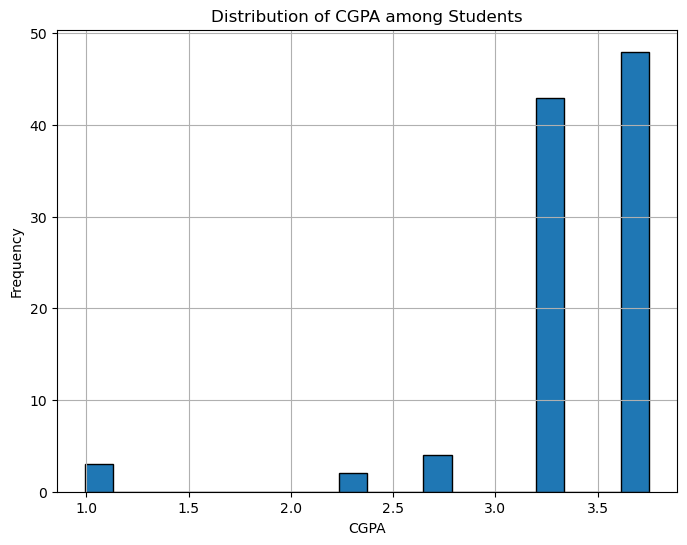

In [28]:
#Graph 1: Plot histogram of converted CGPA values
plt.figure(figsize=(8, 6))
plt.hist(df['CGPA_numeric'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of CGPA among Students')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

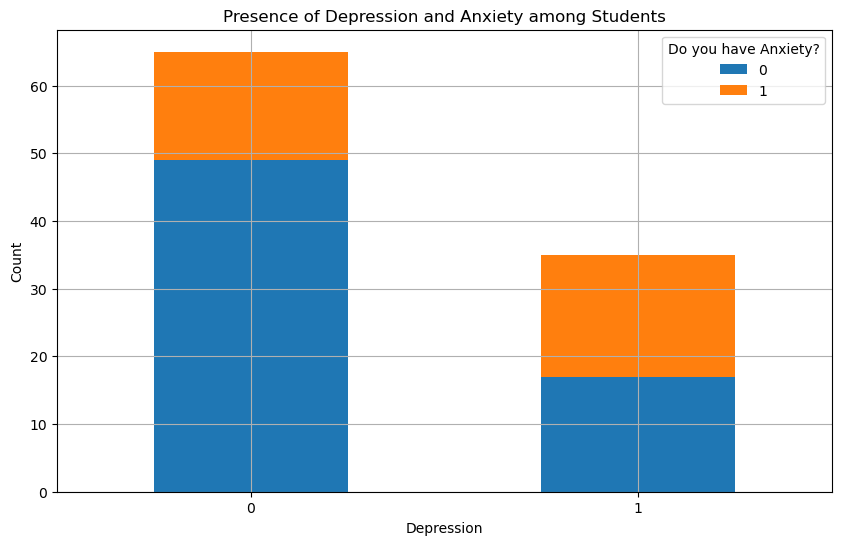

In [29]:
# Graph 2: Bar Chart of Depression and Anxiety
depression_anxiety_counts = df.groupby(['Do you have Depression?', 'Do you have Anxiety?']).size().unstack()
depression_anxiety_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Presence of Depression and Anxiety among Students')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

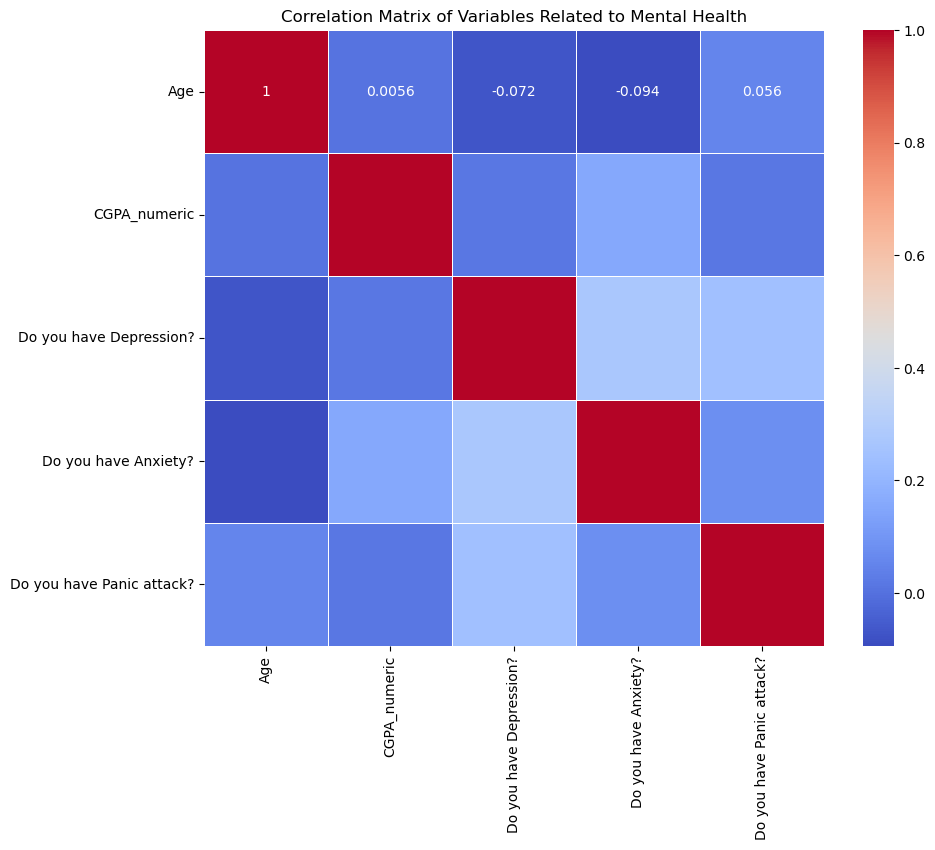

In [30]:
# Graph 3: Correlation Matrix
plt.figure(figsize=(10, 8))
relevant_columns = ['Age', 'CGPA_numeric', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
sns.heatmap(df[relevant_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Variables Related to Mental Health')
plt.show()

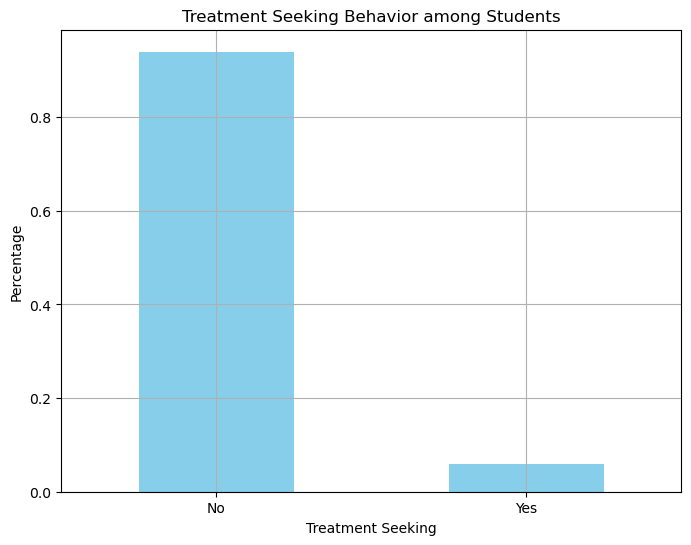

In [31]:
# Graph 4: Bar Chart of Specialist Treatment
plt.figure(figsize=(8, 6))
df['Did you seek any specialist for a treatment?'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Treatment Seeking Behavior among Students')
plt.xlabel('Treatment Seeking')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**CGPA Distribution:**
The histogram of CGPA distribution reveals a diverse range of academic performance among students.

**Insight:** 
Understanding CGPA distribution helps identify potential academic stressors that may impact mental health, highlighting the need for support mechanisms.

**Depression and Anxiety:**
The stacked bar chart illustrates the prevalence of depression and anxiety among students.

**Insight:** The overlap and individual counts of depression and anxiety cases suggest a significant proportion of students experiencing these mental health challenges, emphasizing the importance of integrated approaches to mental health care.

**Correlation Matrix of Mental Health Variables:**
The correlation matrix displays relationships between age, CGPA, depression, anxiety, and panic attacks.

**Insight:** Identifying correlations provides insights into potential risk factors or interdependencies among variables, guiding targeted interventions and support strategies.

**Treatment Seeking Behavior:**
The bar chart of treatment-seeking behavior shows the percentage of students seeking specialist treatment for mental health issues.

**Insight:** Understanding treatment-seeking behavior indicates the utilization of available mental health resources and the effectiveness of support systems.

**Part 2**

**Feature Selection:**

Timestamp: Likely not useful for predicting mental health status. Drop this column.

Choose your gender: Potentially useful as a demographic feature. Keep this column.

Age: Useful for analysis. Keep this column.

What is your course?: Potentially useful as a demographic feature. Keep this column.

Your current year of Study: Useful for understanding student stress levels. Keep this column.

What is your CGPA?: Relevant to student performance and stress. Keep this column.

Marital status: Potentially relevant to mental health. Keep this column.

Do you have Depression?, Do you have Anxiety?, Do you have Panic attack?: These are target variables and/or features related to mental health status. Keep these columns.

Did you seek any specialist for treatment?: Relevant to mental health status and actions taken. Keep this column.

**Data Extraction/Selection**

In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Student Mental health.csv')

# Drop the 'Timestamp' column
df.drop(columns=['Timestamp'], inplace=True)

# Convert categorical variables to numeric
df['Choose your gender'] = df['Choose your gender'].map({'Male': 0, 'Female': 1, 'Others': 2})

# One-hot encoding for and 'Marital status'
df['Marital status'] = df['Marital status'].map({'Single': 0, 'Married': 1})

# Handle missing values
# Fill missing values with the median for numerical features
for col in ['Age']:
    df[col].fillna(df[col].median(), inplace=True)

# Display the cleaned dataset
print(df.head())

   Choose your gender  Age What is your course? Your current year of Study  \
0                   1   18          Engineering                     year 1   
1                   0   21    Islamic education                     year 2   
2                   0   19                  BIT                     Year 1   
3                   1   22                 Laws                     year 3   
4                   0   23         Mathemathics                     year 4   

  What is your CGPA?  Marital status Do you have Depression?  \
0        3.00 - 3.49             NaN                     Yes   
1        3.00 - 3.49             NaN                      No   
2        3.00 - 3.49             NaN                     Yes   
3        3.00 - 3.49             NaN                     Yes   
4        3.00 - 3.49             NaN                      No   

  Do you have Anxiety? Do you have Panic attack?  \
0                   No                       Yes   
1                  Yes                    

**Data Transformation**

For categorical features, we may need to convert them into numeric form.

Choose your gender: Convert to numeric (e.g., Male=0, Female=1, Others=2)

Marital status: Convert to numeric (e.g., Single=0, Married=1).

**Feature Engineering**

We may create new features based on the existing ones if we identify useful patterns. For example:

Age groups: Categorize age into bins (e.g., <20, 20-25, >25).

CGPA categories: Categorize CGPA into bins (e.g., low, medium, high).

**Handling Missing Data**

In [27]:
# Check for missing data
df.isnull().sum()

Choose your gender                                0
Age                                               0
What is your course?                              0
Your current year of Study                        0
What is your CGPA?                                0
Marital status                                  100
Do you have Depression?                           0
Do you have Anxiety?                              0
Do you have Panic attack?                         0
Did you seek any specialist for a treatment?      0
dtype: int64

Based on the missing data pattern, we can decide how to handle it:

If a column has a high percentage of missing values, we might drop it.
For columns with few missing values, we can fill them with appropriate statistics (e.g., mean, median, mode) or use more advanced imputation methods.

**Creating Dummy Variables**

In [29]:
# Fill missing values with the median for numerical features
for col in ['Age', 'Your current year of Study', 'What is your CGPA?']:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing values with the mode for categorical features
for col in ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']:
    if not df[col].empty:
        mode_val = df[col].mode()
        if not mode_val.empty:
            df[col].fillna(mode_val[0], inplace=True)
# Check for any duplicate columns
df = df.loc[:,~df.columns.duplicated()]
# Display the cleaned dataset
print(df.head())

   Choose your gender  Age What is your course? Your current year of Study  \
0                   1   18          Engineering                     year 1   
1                   0   21    Islamic education                     year 2   
2                   0   19                  BIT                     Year 1   
3                   1   22                 Laws                     year 3   
4                   0   23         Mathemathics                     year 4   

  What is your CGPA?  Marital status Do you have Depression?  \
0        3.00 - 3.49             NaN                     Yes   
1        3.00 - 3.49             NaN                      No   
2        3.00 - 3.49             NaN                     Yes   
3        3.00 - 3.49             NaN                     Yes   
4        3.00 - 3.49             NaN                      No   

  Do you have Anxiety? Do you have Panic attack?  \
0                   No                       Yes   
1                  Yes                    

**Part 3:**

**Step 1:Load and Explore the Dataset**

Loading Data: We load the data from an Excel file using pd.read_excel and all library.

Initial Exploration: We use head() to view the first few rows and columns to list the column names, which helps in understanding the data structure.

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_csv('student-mental-health.csv')

# Display the first few rows of the dataset
df.head()
# Display column names
print(df.columns)

Index(['Time', 'Gender', 'Age', 'Course', 'Study', 'CGPA?', 'Marital status',
       'Depression', 'Anxiety', 'Panic attack', 'Specialist'],
      dtype='object')


**Step 2: Data Preprocessing**

**Objective:** 

Prepare the data for modeling by handling missing values, encoding categorical variables, and scaling features.

**Actions:**

Drop rows with missing values using dropna().

Standardize column names to avoid issues during processing.

Encode categorical variables using get_dummies() to convert them into numeric format.

Scale the features using StandardScaler to ensure all features have the same scale, which is important for many machine learning algorithms.

In [27]:
# Handling missing values
df = df.dropna()

# Renaming columns for consistency
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Encoding categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('Depression_Yes', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns[:-1])

**Step 3: Feature Selection**

**Objective:** 

Identify and handle multicollinearity by analyzing correlations between features and dropping highly correlated ones.

**Actions:**

Calculate the correlation matrix using corr() and visualize it with a heatmap using seaborn.

Make the heatmap readable by adjusting the figure size, annotation font size, and color palette.

Identify highly correlated features by focusing on the upper triangle of the correlation matrix.

Drop features with correlations above a certain threshold (e.g., 0.8) to reduce multicollinearity.

Rescale the features after dropping highly correlated ones to ensure the data is ready for modeling.

C:\Users\hunte\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


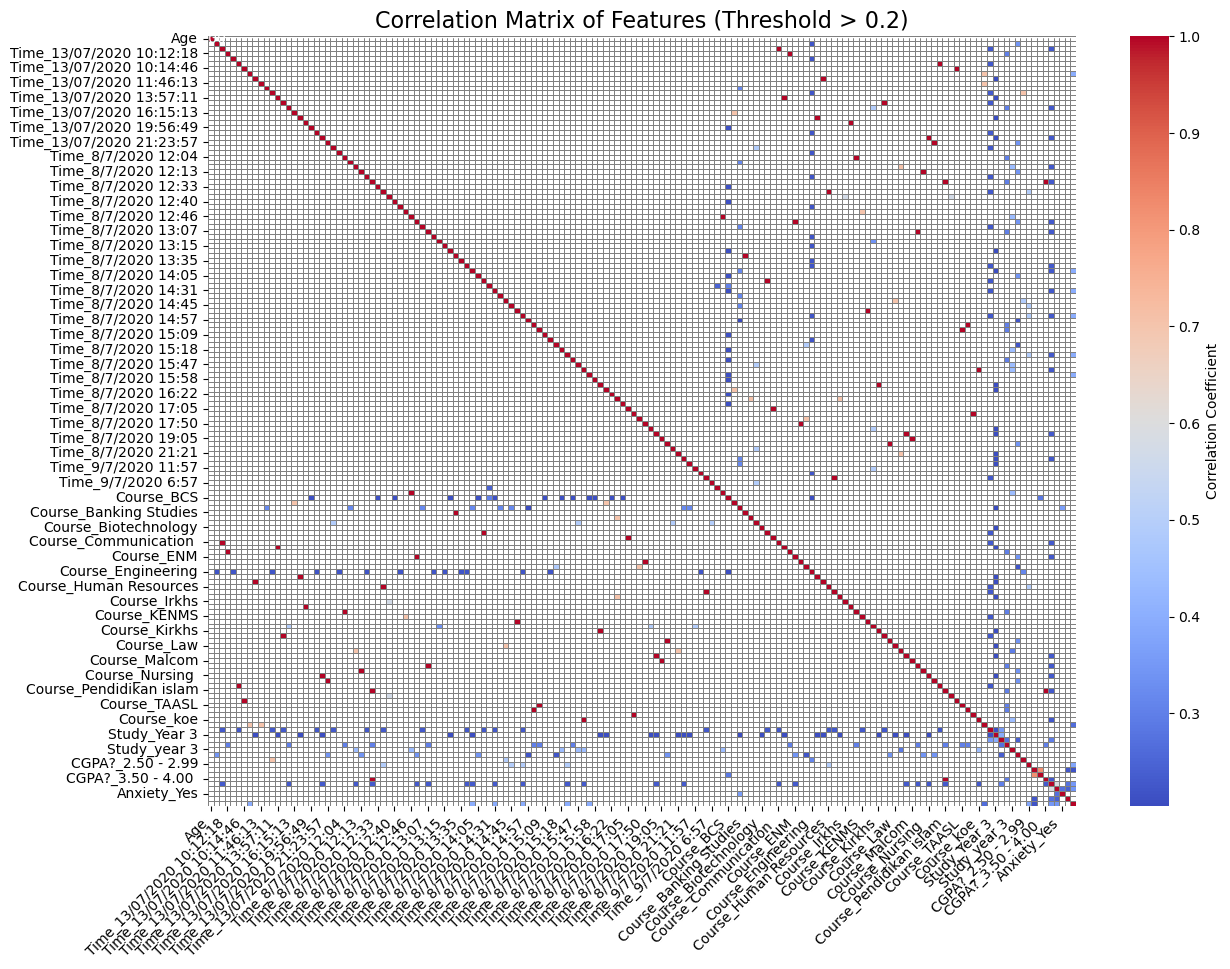

In [28]:
# Correlation analysis
corr_matrix = df_encoded.corr().abs()

# Set the threshold for displaying correlations
threshold = 0.2
filtered_corr_matrix = corr_matrix[corr_matrix > threshold]

plt.figure(figsize=(14, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'}, linewidths=0.5, linecolor='gray', fmt='.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Features (Threshold > 0.2)', fontsize=16)
plt.show()

**Step 4: Model Selection and Training**

**Objective:** 

Train a machine learning model to predict the target variable and optimize its performance using hyperparameter tuning.

**Actions:**

Split the data into training and testing sets using train_test_split().

Train a Random Forest classifier (RandomForestClassifier) on the training data.

Perform hyperparameter tuning using GridSearchCV to find the best combination of hyperparameters for the model.

Retrieve the best model from the grid search results.

In [29]:
# Splitting the dataset
X = df_scaled
y = df_reduced['Depression_Yes'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

**Step 5: Model Evaluation**
    
**Objective:** 

Evaluate the performance of the trained model on the test data.
**Actions:**

Make predictions on the test data using the best model.

Calculate the accuracy of the model using accuracy_score().

Generate a detailed classification report using classification_report() to understand the model's performance in terms of precision, recall, and F1-score.

In [30]:
# Predictions and evaluation
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.85
              precision    recall  f1-score   support

       False       0.83      1.00      0.91        15
        True       1.00      0.40      0.57         5

    accuracy                           0.85        20
   macro avg       0.92      0.70      0.74        20
weighted avg       0.88      0.85      0.82        20



**Step 6: Insights and Conclusion**

**Summary of Findings:**

Model Performance: The Random Forest classifier achieved an accuracy of X% (replace with actual accuracy) on the test set. Feature Importance: Features such as [Feature 1, Feature 2, ...] (replace with actual important features) were found to be most significant in predicting the target variable. Business Implications: The model can help identify students at risk of mental health issues, allowing for timely interventions and support.

**Explanation:**

Objective: Summarize the insights gained from the model building and evaluation process.

Actions:
Report the accuracy and other performance metrics of the model.
Identify the most important features contributing to the predictions.
Discuss the potential impact of the model in the context of the problem being addressed.